## La siguiente linea es necesaria para poder utilisar statsmodel de la libreria matplotlib

In [1]:
pip install pandas numpy statsmodels matplotlib

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

Datos del Experimento:
  Distribucion      Hardening  Tiempo
0         Kali  Sin Hardening    0.55
1         Kali  Con Hardening    1.38
2      Kodashi  Sin Hardening    1.20
3      Kodashi  Con Hardening    2.21
4       Parrot  Sin Hardening    0.71
5       Parrot  Con Hardening    2.56

Resultado del ANOVA:
                  sum_sq   df          F    PR(>F)
C(Distribucion)  0.66760  2.0   2.252362  0.307469
C(Hardening)     2.26935  1.0  15.312753  0.059533
Residual         0.29640  2.0        NaN       NaN


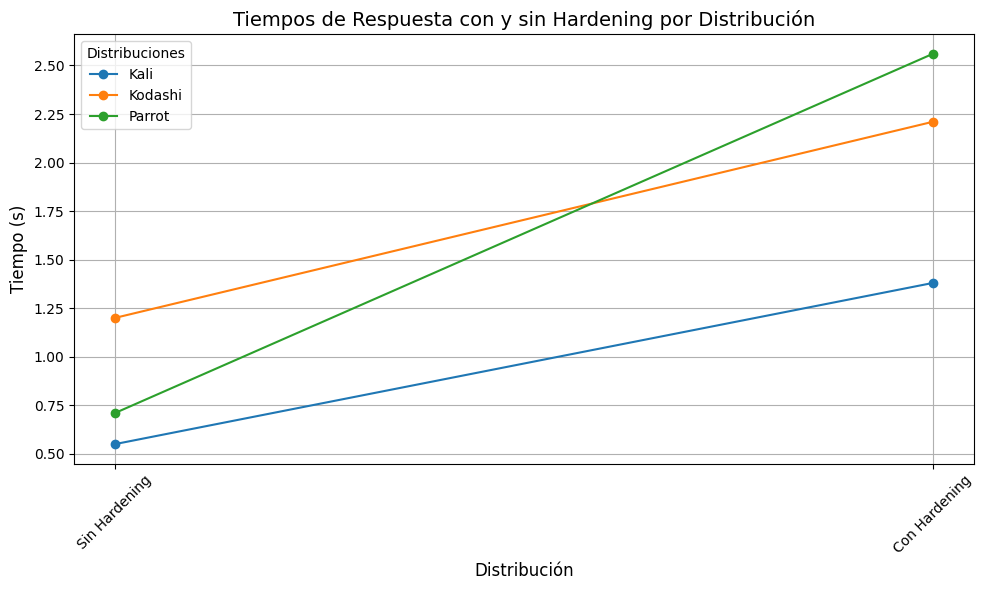

In [3]:

# Crear el DataFrame con los tiempos de respuesta
data = {
    'Distribucion': ['Kali', 'Kali', 'Kodashi', 'Kodashi', 'Parrot', 'Parrot'],
    'Hardening': ['Sin Hardening', 'Con Hardening', 'Sin Hardening', 'Con Hardening', 'Sin Hardening', 'Con Hardening'],
    'Tiempo': [0.55, 1.38, 1.2, 2.21, 0.71, 2.56]
}

df = pd.DataFrame(data)

# Mostrar los datos
print("Datos del Experimento:")
print(df)

# Modelo de Análisis de Varianza (ANOVA) para ver la influencia de las variables
modelo = ols('Tiempo ~ C(Distribucion) + C(Hardening)', data=df).fit()

# Realizar el análisis de varianza
anova_result = sm.stats.anova_lm(modelo, typ=2)
print("\nResultado del ANOVA:")
print(anova_result)

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.title('Tiempos de Respuesta con y sin Hardening por Distribución', fontsize=14)
plt.xlabel('Distribución', fontsize=12)
plt.ylabel('Tiempo (s)', fontsize=12)
plt.xticks(rotation=45)
for distribucion in df['Distribucion'].unique():
    subset = df[df['Distribucion'] == distribucion]
    plt.plot(subset['Hardening'], subset['Tiempo'], marker='o', label=distribucion)

plt.legend(title='Distribuciones')
plt.grid(True)
plt.tight_layout()
plt.show()